# In Depth Analysis - HW-03 part 3

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Introduce the data and add appropriate columns

In [2]:
# Access the file from my github
github_file = "https://raw.githubusercontent.com/ArinzeDavidUCL/DS-A/main/AAPL.csv"

df = pd.read_csv(github_file, parse_dates=True, index_col=0)                  # read the csv 
df['Open - Close chg'] =  df['Close']- df['Open']/df['Open']                  # create daily change column
df["%-chg"] = df['Close'].pct_change()                                        # price pct change / simple returns
df['Log returns'] = np.log(df['Adj Close']/df['Adj Close'].shift())           # Log returns
df['Normalised Adj Close'] = df['Adj Close']/df['Adj Close'].iloc[0]          # create normalized column 

 ## Basic plots of Open, High, Close, Adj Close

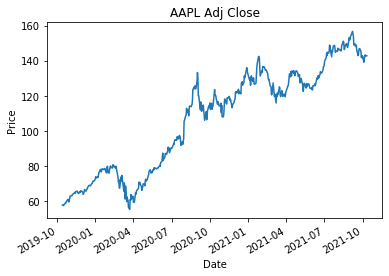

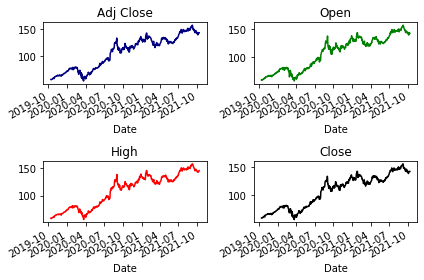

In [3]:
# Create subplots
fig, ax = plt.subplots()
df['Adj Close'].plot(ax =ax, title= 'AAPL Adj Close');
ax.set_ylabel('Price');

# Show data plots of open high close adj close
fig, ax = plt.subplots(2,2)
df['Adj Close'].plot(ax=ax[0,0], title='Adj Close', color='navy')
df['Open'].plot(ax=ax[0,1], title='Open', color='green')
df['High'].plot(ax=ax[1,0], title='High', color='red')
df['Close'].plot(ax=ax[1,1], title='Close', color='black')
plt.tight_layout()

## Plot the volatility

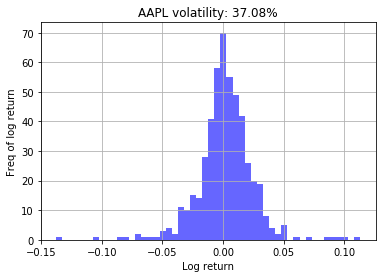

In [4]:
volatility = df['Log returns'].std()*252**.5                             # Calculate the volatility and plot it
vol_pct = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility: " + vol_pct + "%");

## Plot the simple (MA) and exponential (EMA) moving average

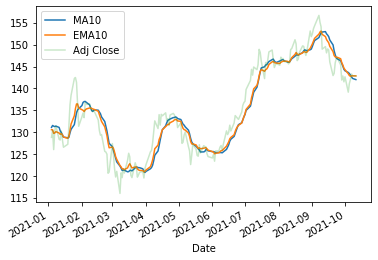

In [5]:
fig, ax = plt.subplots()
df['MA10'] = df['Adj Close'].rolling(10).mean()                            # 10 day moving average
df['EMA10'] = df['Adj Close'].ewm(span=10, adjust=False).mean()            # 10 days exponential moving average
df[['MA10', 'EMA10']].loc['2021-01-01':].plot(ax=ax)                       # Plot the datapoints on the axis
df['Adj Close'].loc['2021-01-01':].plot(ax=ax, alpha=0.25, legend=True);   # Add the Adj Close

## Volume

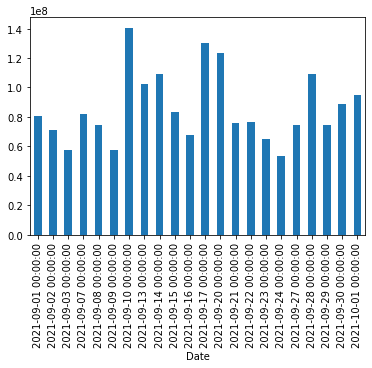

In [6]:
# Plot the the Volume of stock movement
fig, ax = plt.subplots()
df['Volume'].loc['2021-09-01':'2021-10-01'].plot.bar(ax=ax);

### MACD 

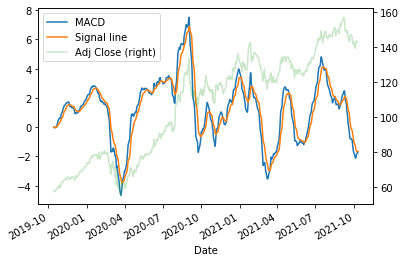

In [8]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()
fig, ax = plt.subplots()
df[['MACD', 'Signal line']].plot(ax=ax)
df['Adj Close'].plot(ax=ax, alpha=0.25, secondary_y=True, legend=True);